In [39]:
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic= pd.read_csv('titanic_train.csv')

In [3]:
print titanic.head(5)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print titanic.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


F:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


**As the count of Age is lesser than other counts, it means that it has NA values. We replace all the missing values with the median of the Age values**

In [5]:
titanic['Age']= titanic['Age'].fillna(titanic['Age'].median())

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling non-numeric columns
---
We either have to exclude the non-numeric columns when we train our algorithm (Name, Sex, Cabin, Embarked, and Ticket), or find a way to convert them to numeric columns.
So we ignore Name, Cabin and Ticket columns

Converting the Sex column to numeric
---
**We assign a code of 0 to male, and 1 to female.**

In [7]:
titanic.loc[titanic['Sex']== 'male', 'Sex'] = 0
titanic.loc[titanic['Sex']== 'female', 'Sex'] = 1

Converting the Embarked column
---


In [8]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

The unique values in Embarked are S, C, Q, and missing (nan). 
**As S is the most common one, let's replace all the missing values with S.**

In [9]:
titanic['Embarked']= titanic['Embarked'].fillna('S')
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

**We'll assign the code 0 to S, 1 to C, and 2 to Q.**

In [10]:
titanic.loc[titanic['Embarked']== 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked']== 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked']== 'Q', 'Embarked'] = 2
titanic['Embarked'].unique()

array([0, 1, 2], dtype=object)

LINEAR REGRESSION
---

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

# the columns
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
linreg= LinearRegression()
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)


In [12]:
predictions = []
for train, test in kf:
    train_predictors = (titanic[predictors].iloc[train,:])
    train_target = titanic['Survived'].iloc[train]
    linreg.fit(train_predictors, train_target)
    test_predictions = linreg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [13]:
predictions

[array([  8.99877810e-02,   9.60756206e-01,   5.92676278e-01,
          9.31138728e-01,   5.29343071e-02,   1.70275685e-01,
          3.69943590e-01,   1.03474847e-01,   5.21597906e-01,
          8.74491050e-01,   6.48883611e-01,   8.29742769e-01,
          1.34797198e-01,  -1.61126844e-01,   6.58141307e-01,
          6.39819748e-01,   1.51733875e-01,   2.95432718e-01,
          5.35377959e-01,   6.21007683e-01,   2.61872592e-01,
          2.62687561e-01,   7.31739160e-01,   5.05995897e-01,
          5.61398567e-01,   3.35039734e-01,   1.30338808e-01,
          4.68765767e-01,   6.60737753e-01,   9.10819218e-02,
          4.77223920e-01,   1.04220026e+00,   6.60691613e-01,
          8.71539273e-02,   5.28550732e-01,   4.01874338e-01,
          1.30340307e-01,   1.29339672e-01,   5.72717129e-01,
          6.65238822e-01,   4.83215779e-01,   7.60807408e-01,
          1.30578363e-01,   8.71867121e-01,   7.09855487e-01,
          9.11369897e-02,   1.39181745e-01,   6.60691613e-01,
        

Evaluating Prediction Error
---

In [14]:
# The predictions are in three different NumPy arrays. Concatenate into one array

predictions= np.concatenate(predictions, axis=0)
predictions[predictions> 0.5] = 1
predictions[predictions<= 0.5] = 0
accuracy= sum(predictions[predictions==titanic['Survived']])/ len(predictions)

F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [15]:
print accuracy

0.783389450056


LOGISTIC REGRESSION
---

In [16]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(logreg, titanic[predictors], titanic['Survived'], cv=3)
print scores.mean()

0.787878787879


Processing the test set to replace values
---

In [17]:
titanic_test= pd.read_csv('titanic_test.csv')

In [18]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
# The age has to be the exact same value we used to replace the missing ages in the training set
titanic_test['Age']= titanic_test['Age'].fillna(titanic['Age'].median())

In [20]:
titanic_test.loc[titanic_test['Sex']== 'male', 'Sex'] = 0
titanic_test.loc[titanic_test['Sex']== 'female', 'Sex'] = 1

In [21]:
titanic_test['Embarked']= titanic_test['Embarked'].fillna('S')

In [22]:
titanic_test.loc[titanic_test['Embarked']== 'S', 'Embarked'] = 0
titanic_test.loc[titanic_test['Embarked']== 'C', 'Embarked'] = 1
titanic_test.loc[titanic_test['Embarked']== 'Q', 'Embarked'] = 2

In [23]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())

Generating a submission file
---

In [24]:
logreg = LogisticRegression(random_state=1)
logreg.fit(titanic[predictors], titanic['Survived'])
predictions = logreg.predict(titanic_test[predictors])

submission = DataFrame({'PassengerId': titanic_test['PassengerId'],
                        'Survived': predictions})

In [25]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


IMPROVING MY SUBMISSION
---

Implement a Random Forest
------

In [26]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [27]:
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(rf, titanic[predictors], titanic['Survived'], cv=kf)
print(scores.mean())

0.785634118967


**Increasing the value of min_samples_split and min_samples_leaf to reduce overfitting**

In [28]:
rf = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(rf, titanic[predictors], titanic['Survived'], cv=kf)
print(scores.mean())

0.81593714927


Generating new features with .apply
---

The length of the name. This could pertain to how rich the person was, and therefore their position on the Titanic.

The total number of people in a family (SibSp + Parch).


In [29]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

titanic['NameLen'] = titanic['Name'].apply(lambda x: len(x))

In [30]:
import re

# A function to get the title from a name
def get_title(name):
    # Use a regular expression to search for a title  
    # Titles always consist of capital and lowercase letters, and end with a period
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ""

In [31]:
# Get all of the titles, and print how often each one occurs
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64


In [32]:
# Map each title to an integer  
# Some titles are very rare, so they're compressed into the same codes as other titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything
print(pd.value_counts(titles))

# Add in the title column
titanic["Title"] = titles

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


Generating a feature for family groups
---

In [33]:
# To create this feature, we'll concatenate each passenger's last name with FamilySize to get a unique family ID. 
# Then we'll be able to assign a code to each person based on their family ID.

import operator

family_id_mapping = {}

def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family ID
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the ID in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum ID from the mapping, and add 1 to it if we don't have an ID
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

In [36]:
# Get the family IDs with the apply method
family_ids = titanic.apply(get_family_id, axis=1)

# There are a lot of family IDs, so we'll compress all of the families with less than three members into one code
family_ids[titanic["FamilySize"] < 3] = -1

# Print the count of each unique ID
print(pd.value_counts(family_ids))

titanic["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


Identifying the best features to use
---

One way to accomplish this is to use univariate feature selection. This approach essentially involves reviewing a data set column by column to identify the ones that correlate most closely with what we're trying to predict (Survived).

The SelectKBest function selects the best features from the data. We can specify how many features we want this function to select.

In [37]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,NameLen,FamilyId
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602,26.965208,14.232323
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,9.281607,69.886368
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,12.000000,-1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,20.000000,-1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,25.000000,-1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,30.000000,-1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,82.000000,633.000000


In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId", "NameLen"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform them from p-values into scores
scores = -np.log10(selector.pvalues_)

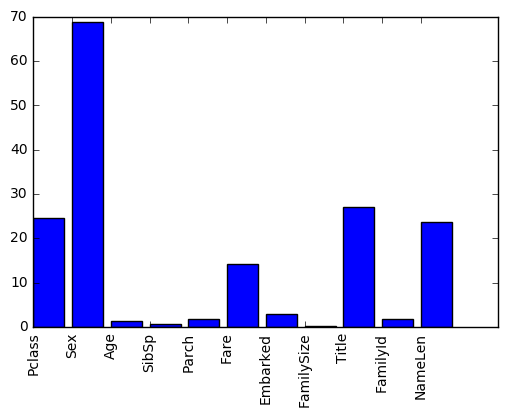

In [40]:
# Plot the scores  
# "Pclass", "Sex", "Title", and "Fare" are the best features
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [41]:
# Pick only the four best features
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
# Compute the accuracy score for all the cross-validation folds; this is much simpler than what we did before
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.817059483726
